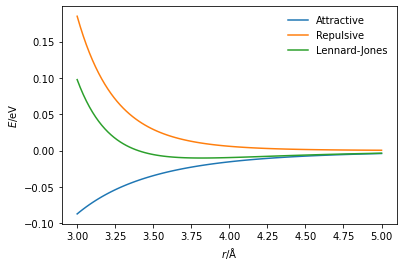

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def attractive_energy(r, epsilon, sigma):
    """
    Attractive component of the Lennard-Jones 
    interactionenergy.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Negative of the potential energy at the 
        equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Energy of attractive component of 
        Lennard-Jones interaction (eV)
    """
    return -4 * epsilon * np.power(sigma / r, 6)

def repulsive_energy(r, epsilon, sigma):
    """
    Repulsive component of the Lennard-Jones 
    interactionenergy.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Negative of the potential energy at the 
        equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Energy of repulsive component of 
        Lennard-Jones interaction (eV)
    """
    return 4 * epsilon * np.power(sigma / r, 12)

def lj_energy(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Negative of the potential energy at the 
        equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Energy of the Lennard-Jones potential 
        model (eV)
    """
    return repulsive_energy(
        r, epsilon, sigma) + attractive_energy(
        r, epsilon, sigma)

r = np.linspace(3, 5, 100)
plt.plot(r, attractive_energy(r, 0.0103, 3.4),
         label='Attractive')
plt.plot(r, repulsive_energy(r, 0.0103, 3.4), 
         label='Repulsive')
plt.plot(r, lj_energy(r, 0.0103, 3.4), 
         label='Lennard-Jones')
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.legend(frameon=False)
plt.show()

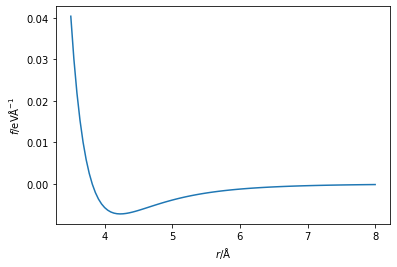

In [2]:
def lj_force(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    return 48 * epsilon * np.power(
        sigma, 12) / np.power(
        r, 13) - 24 * epsilon * np.power(
        sigma, 6) / np.power(r, 7)
    
r = np.linspace(3.5, 8, 100)
plt.plot(r, lj_force(r, 0.0103, 3.4))
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$f$/eVÅ$^{-1}$')
plt.show()

In [3]:
from scipy.constants import Boltzmann

def init_velocity(T, number_of_particles):
    """
    Initialise the velocities for a series 
    of particles.
    
    Parameters
    ----------
    T: float
        Temperature of the system at 
        initialisation (K)
    number_of_particles: int
        Number of particles in the 
        system
    
    Returns
    -------
    ndarray of floats
        Initial velocities for a series of 
        particles (eVs/Åamu)
    """
    R = np.random.rand(number_of_particles) - 0.5
    return R * np.sqrt(Boltzmann * T / (mass_of_argon * 1.602e-19))